In [1]:
import os

In [2]:
print(os.listdir('/Volumes/T7/VGG16 model practice/VGG16-practice/Peach Crop plant Village DS'))


['Peach___healthy', 'Peach___Bacterial_spot', '._Peach___healthy', '._Peach___Bacterial_spot']


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Cleaning Dataset

In [5]:
plant_directory='/Volumes/T7/VGG16 model practice/VGG16-practice/Peach Crop plant Village DS' 

non_healthy='/Volumes/T7/VGG16 model practice/VGG16-practice/Peach Crop plant Village DS/Peach___Bacterial_spot'
for i in os.listdir(non_healthy):
    if i.startswith("._"):
        file_path = os.path.join(non_healthy, i)
        if os.path.exists(file_path):
            os.remove(file_path)
        else:
            print(f"File '{i}' does not exist.")

healthy='/Volumes/T7/VGG16 model practice/VGG16-practice/Peach Crop plant Village DS/Peach___healthy'
for i in os.listdir(healthy):
    if i.startswith("._"):
        file_path = os.path.join(healthy, i)
        if os.path.exists(file_path):
            os.remove(file_path)
        else:
            print(f"File '{i}' does not exist.")


Loading images

In [6]:


datagen=ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary',
    subset="training"
)

test_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


Defining VGG 16 archetecture

In [9]:
vgg16_model=tf.keras.Sequential()

# First two Convolutional layers
# 224 X 224 X 64

vgg16_model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(224,224,3)))
vgg16_model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
vgg16_model.add(tf.keras.layers.MaxPool2D(2,2))

# Subsequent layers
# 112 X 112 X 128

for i in range(2):
    vgg16_model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
vgg16_model.add(tf.keras.layers.MaxPool2D(2,2))

# 56 X 56 X 256

for i in range(3):
    vgg16_model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
vgg16_model.add(tf.keras.layers.MaxPool2D(2,2))

# 28 X 28 X 512

for i in range(3):
    vgg16_model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
vgg16_model.add(tf.keras.layers.MaxPool2D(2,2))

# 14 X 14 X 512

for i in range(3):
    vgg16_model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
vgg16_model.add(tf.keras.layers.MaxPool2D(2,2))

# flaten layer
vgg16_model.add(tf.keras.layers.Flatten())

# Fully Connected Layers

for i in range(2):
    vgg16_model.add(tf.keras.layers.Dense(4096,activation="relu"))

vgg16_model.add(tf.keras.layers.Dense(1000,activation='relu'))


#Output Layer

vgg16_model.add(tf.keras.layers.Dense(2,activation='softmax'))


vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

Compile MOdel

In [10]:
vgg16_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

TRain the Model

In [11]:
history=vgg16_model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator)

)

Epoch 1/10
34/34 [==============================] - 779s 23s/step - loss: 0.4631 - accuracy: 0.8391 - val_loss: 0.3972 - val_accuracy: 0.8644
Epoch 2/10
34/34 [==============================] - 1619s 48s/step - loss: 0.4807 - accuracy: 0.8645 - val_loss: 0.4326 - val_accuracy: 0.8644
Epoch 3/10
34/34 [==============================] - 886s 26s/step - loss: 0.4184 - accuracy: 0.8645 - val_loss: 0.3991 - val_accuracy: 0.8644
Epoch 4/10
34/34 [==============================] - 956s 28s/step - loss: 0.4014 - accuracy: 0.8645 - val_loss: 0.3976 - val_accuracy: 0.8644
Epoch 5/10
34/34 [==============================] - 960s 28s/step - loss: 0.4026 - accuracy: 0.8645 - val_loss: 0.3969 - val_accuracy: 0.8644
Epoch 6/10
34/34 [==============================] - 985s 29s/step - loss: 0.4007 - accuracy: 0.8645 - val_loss: 0.3991 - val_accuracy: 0.8644
Epoch 7/10
34/34 [==============================] - 938s 28s/step - loss: 0.3990 - accuracy: 0.8645 - val_loss: 0.4000 - val_accuracy: 0.8644
Epoch

Plotting

In [13]:
import matplotlib.pyplot as plt

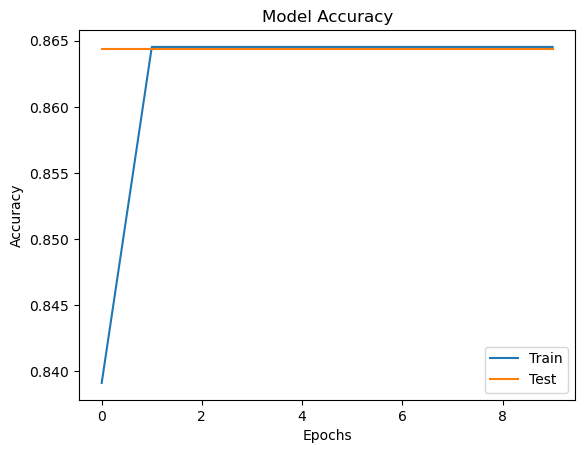

In [14]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(['Train','Test'])
plt.show()

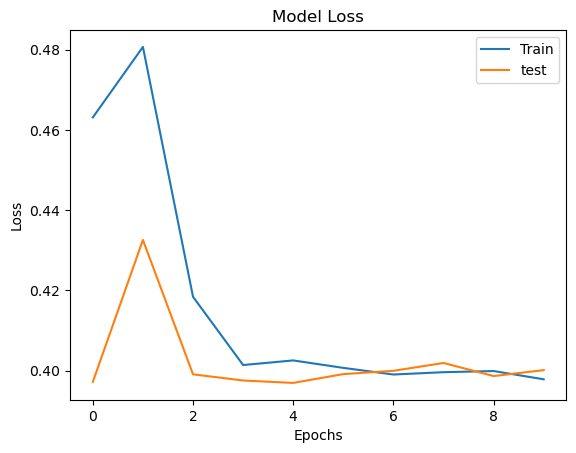

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(['Train',"test"])
plt.show()